In [12]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
df = pd.read_csv(url)

df.columns = ["Date","Sales"]
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

df.head()

,Sales
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [13]:
df["lag1"] = df["Sales"].shift(1)
df["lag2"] = df["Sales"].shift(2)
df["lag3"] = df["Sales"].shift(3)

df["rolling_mean_3"] = df["Sales"].shift(1).rolling(3).mean()
df["rolling_mean_7"] = df["Sales"].shift(1).rolling(7).mean()

df.dropna(inplace=True)

df.head()

,Sales,lag1,lag2,lag3,rolling_mean_3,rolling_mean_7
Date,,,,,,
1959-01-08,43,45.0,29.0,44.0,39.333333,35.142857
1959-01-09,38,43.0,45.0,29.0,39.000000,36.285714
1959-01-10,27,38.0,43.0,45.0,42.000000,37.142857
1959-01-11,38,27.0,38.0,43.0,36.000000,36.714286
1959-01-12,33,38.0,27.0,38.0,34.333333,37.714286


In [14]:
X = df[["lag1","lag2","lag3","rolling_mean_3","rolling_mean_7"]]
y = df["Sales"]

print(X.shape)

(358, 5)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, pred)
print(mae)

5.209115585392771


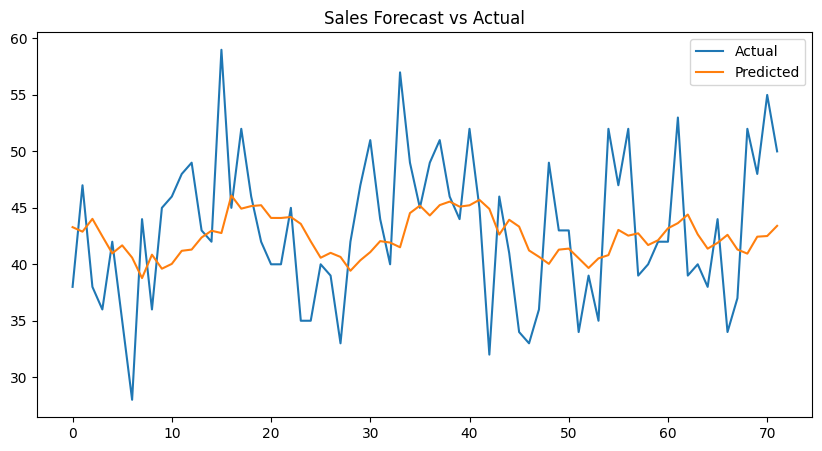

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.title("Sales Forecast vs Actual")
plt.show()
